In [ ]:
import torch
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from moviepy.editor import AudioFileClip

In [ ]:
import librosa
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import json
import math
from sklearn.preprocessing import LabelEncoder,StandardScaler
import csv
from sklearn.model_selection import train_test_split

In [ ]:
!pip install torch torchvision torchaudio transformers google-colab opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline


In [ ]:
ssakda['prediction']

0       <emotion : neutral>
1            <emotion: joy>
2        <emotion: neutral>
3            <emotion: joy>
4        <emotion: neutral>
               ...         
2605         <emotion: joy>
2606     <emotion: sadness>
2607         <emotion: joy>
2608     <emotion: neutral>
2609     <emotion: neutral>
Name: prediction, Length: 2610, dtype: object

In [ ]:
ssakda['prediction'].value_counts()

prediction
<emotion: neutral>                   754
<emotion: joy>                       544
<emotion: surprise>                  483
<emotion: sadness>                   261
<emotion: anger>                     158
<emotion: disgust>                    71
<emotion: fear>                       70
<emotion: frustration>                45
<emotion : neutral>                   39
<emotion : joy>                       24
<emotion : surprise>                  23
<emotion: curiosity>                  21
<emotion: confusion>                  13
<emotion: annoyance>                  12
<emotion: concern>                    11
<emotion : anger>                      7
<emotion : fear>                       6
<emotion: sarcasm>                     6
<emotion: determination>               6
<emotion: encouragement>               6
<emotion: embarrassment>               6
<emotion : sadness>                    5
<emotion : disgust>                    3
<emotion: hope>                        3
<emot

In [ ]:
utt = pd.read_csv('/content/onlyUT_GPT_4o_History_final_output.csv', encoding='cp949')

In [ ]:
utt['prediction'].value_counts()

prediction
<emotion: neutral>           856
<emotion: surprise>          670
<emotion: joy>               355
<emotion: anger>             256
<emotion: sadness>           199
<emotion: fear>              114
<emotion: disgust>           111
<emotion: frustration>        12
<emotion : neutral>            5
<emotion: sarcasm>             4
<emotion: confusion>           4
<emotion: encouragement>       3
<emotion : surprise>           3
<emotion: urgency>             2
<emotion: disappointment>      2
<emotion: determination>       2
<emotion : anger>              1
<emotion : concern>            1
<emotion: regret>              1
<emotion: concern>             1
<emotion : joy>                1
<emotion: curiosity>           1
<emotion: curiosity>           1
<emotion: discomfort>          1
<emotion: confusion            1
<emotion: annoyance>           1
<emotion: worry>               1
<emotion: hope>                1
Name: count, dtype: int64

In [ ]:
accum = pd.read_csv('/content/Accm_GPT_4o_History_final_output.csv')

In [ ]:
accum['prediction'].value_counts()

prediction
<emotion: neutral>                                            852
<emotion: surprise>                                           618
<emotion: joy>                                                344
<emotion: sadness>                                            256
<emotion: anger>                                              214
<emotion: fear>                                                82
<emotion: disgust>                                             68
<emotion: frustration>                                         40
<emotion : neutral>                                            22
<emotion : surprise>                                           19
<emotion : joy>                                                11
<emotion: concern>                                              9
<emotion: curiosity>                                            8
<emotion: embarrassment>                                        6
<emotion: encouragement>                                        5

In [ ]:
group_a = ssakda['prediction'].unique()
group_a = list(group_a)

In [ ]:
ssakda  = pd.read_csv('/content/ssakda_GPT_4o_History_final_output.csv')

In [ ]:
# Define the two groups of emotions
ssakda['prediction'] = ssakda['prediction'].apply(lambda x: re.sub(r'<emotion\s*:\s*([^>]+)>', r'\1', x))
array = ssakda['prediction'].unique()
cleaned_array = np.array([re.sub(r'<emotion\s*:\s*', '', emotion) for emotion in array])

# Ensure the cleaned array elements are of Python string type
cleaned_array = [str(emotion) for emotion in cleaned_array]

group_b = ["neutral", "joy", "surprise", "sadness", "anger", "disgust", "fear"]

# Get the vectors for each emotion in cleaned_array and group_b
vectors_a = np.array([nlp(emotion).vector for emotion in cleaned_array])
vectors_b = np.array([nlp(emotion).vector for emotion in group_b])

# Calculate the cosine similarity between each pair of vectors
similarity_matrix = cosine_similarity(vectors_a, vectors_b)

# Find the most similar emotion from group_b for each emotion in cleaned_array
most_similar = similarity_matrix.argmax(axis=1)

# Replace each emotion in cleaned_array with the most similar emotion from group_b
replaced_emotions = [group_b[idx] for idx in most_similar]

# Print the original and replaced emotions
for original, replaced in zip(cleaned_array, replaced_emotions):
    print(f"{original} -> {replaced}")

neutral -> neutral
joy -> joy
irritation -> sadness
frustration -> anger
surprise -> surprise
disgust -> disgust
fear -> fear
curiosity -> sadness
sadness -> sadness
anger -> anger
determination -> neutral
annoyance -> anger
sarcasm -> disgust
panic -> fear
sarcastic -> sadness
desire -> sadness
concern -> fear
urgency -> anger
embarrassment -> anger
amusement -> sadness
confusion -> anger
defiance -> anger
disagreement -> anger
humor -> sadness
regret -> disgust
remorse -> disgust
defensiveness -> neutral
confidence -> sadness
hope -> joy
excitement -> sadness
caution -> fear
suspicion -> fear
concerned -> fear
reassurance -> surprise
nervousness -> sadness
encouragement -> sadness
neutrality -> neutral
frustration -> anger
relief -> sadness
neutrality -> neutral
self-deprecating humor -> sadness


In [ ]:
ssakda  = pd.read_csv('/content/ssakda_GPT_4o_History_final_output.csv')
accum = pd.read_csv('/content/Accm_GPT_4o_History_final_output.csv')
utt = pd.read_csv('/content/onlyUT_GPT_4o_History_final_output.csv', encoding='cp949')
threeaccum = pd.read_csv('/content/three_Accm_GPT_4o_History_final_output.csv')
gandan = pd.read_csv('/content/gandan_GPT_4o_History_final_output.csv')

In [ ]:
al_gandan = pd.read_csv('/content/al_gandan_GPT_4o_History_final_output.csv')

al_gandan Accuracy: 54.83%


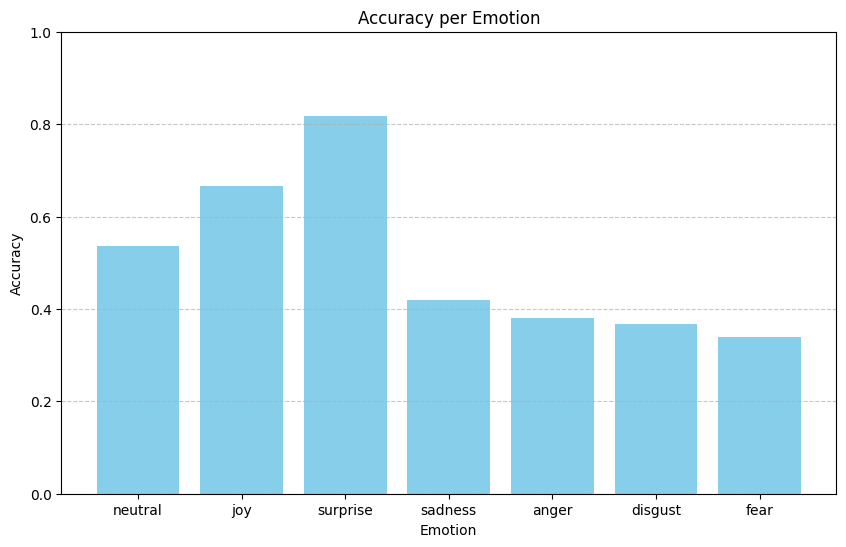

In [ ]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
import pandas as pd
nlp = spacy.load('en_core_web_md')

al_gandan['prediction'] = al_gandan['prediction'].apply(lambda x: re.sub(r'<emotion\s*:\s*([^>]+)>', r'\1', x))
array1 = al_gandan['prediction'].unique()
cleaned_array1 = np.array([re.sub(r'<emotion\s*:\s*', '', emotion) for emotion in array1])

cleaned_array1 = [str(emotion) for emotion in cleaned_array1]

group_b = ["neutral", "joy", "surprise", "sadness", "anger", "disgust", "fear"]
def find_most_similar_emotion(text):
    vector_a = nlp(text).vector
    vectors_b = np.array([nlp(emotion).vector for emotion in group_b])
    similarities = cosine_similarity([vector_a], vectors_b)
    most_similar_index = np.argmax(similarities)
    return group_b[most_similar_index]
al_gandan['prediction'] = al_gandan['prediction'].apply(find_most_similar_emotion)

accuracy1 = (al_gandan['Emotion'] == al_gandan['prediction']).mean()

print(f"al_gandan Accuracy: {accuracy1 * 100:.2f}%")
accuracy_per_emotion = {}
for emotion in group_b:
    mask = al_gandan['Emotion'] == emotion
    accuracy = (al_gandan[mask]['Emotion'] == al_gandan[mask]['prediction']).mean()
    accuracy_per_emotion[emotion] = accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(accuracy_per_emotion.keys(), accuracy_per_emotion.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Accuracy')
plt.title('Accuracy per Emotion')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
import pandas as pd

nlp = spacy.load('en_core_web_md')

accum['prediction'] = accum['prediction'].apply(lambda x: re.sub(r'<emotion\s*:\s*([^>]+)>', r'\1', x))
array1 = accum['prediction'].unique()
cleaned_array1 = np.array([re.sub(r'<emotion\s*:\s*', '', emotion) for emotion in array1])

cleaned_array1 = [str(emotion) for emotion in cleaned_array1]

group_b = ["neutral", "joy", "surprise", "sadness", "anger", "disgust", "fear"]
def find_most_similar_emotion(text):
    vector_a = nlp(text).vector
    vectors_b = np.array([nlp(emotion).vector for emotion in group_b])
    similarities = cosine_similarity([vector_a], vectors_b)
    most_similar_index = np.argmax(similarities)
    return group_b[most_similar_index]

ssakda['prediction'] = ssakda['prediction'].apply(lambda x: re.sub(r'<emotion\s*:\s*([^>]+)>', r'\1', x))
array2 = ssakda['prediction'].unique()
cleaned_array2 = np.array([re.sub(r'<emotion\s*:\s*', '', emotion) for emotion in array2])

cleaned_array2 = [str(emotion) for emotion in cleaned_array2]

utt['prediction'] = utt['prediction'].apply(lambda x: re.sub(r'<emotion\s*:\s*([^>]+)>', r'\1', x))
array3 = utt['prediction'].unique()
cleaned_array3 = np.array([re.sub(r'<emotion\s*:\s*', '', emotion) for emotion in array3])

cleaned_array3 = [str(emotion) for emotion in cleaned_array3]

threeaccum['prediction'] = threeaccum['prediction'].apply(lambda x: re.sub(r'<emotion\s*:\s*([^>]+)>', r'\1', x))
array4 = threeaccum['prediction'].unique()
cleaned_array4 = np.array([re.sub(r'<emotion\s*:\s*', '', emotion) for emotion in array4])

cleaned_array4 = [str(emotion) for emotion in cleaned_array4]

gandan['prediction'] = gandan['prediction'].apply(lambda x: re.sub(r'<emotion\s*:\s*([^>]+)>', r'\1', x))
array5 = gandan['prediction'].unique()
cleaned_array5 = np.array([re.sub(r'<emotion\s*:\s*', '', emotion) for emotion in array5])

cleaned_array5 = [str(emotion) for emotion in cleaned_array5]

accum['prediction'] = accum['prediction'].apply(find_most_similar_emotion)
ssakda['prediction'] = ssakda['prediction'].apply(find_most_similar_emotion)
utt['prediction'] = utt['prediction'].apply(find_most_similar_emotion)
threeaccum['prediction'] = threeaccum['prediction'].apply(find_most_similar_emotion)
gandan['prediction'] = gandan['prediction'].apply(find_most_similar_emotion)


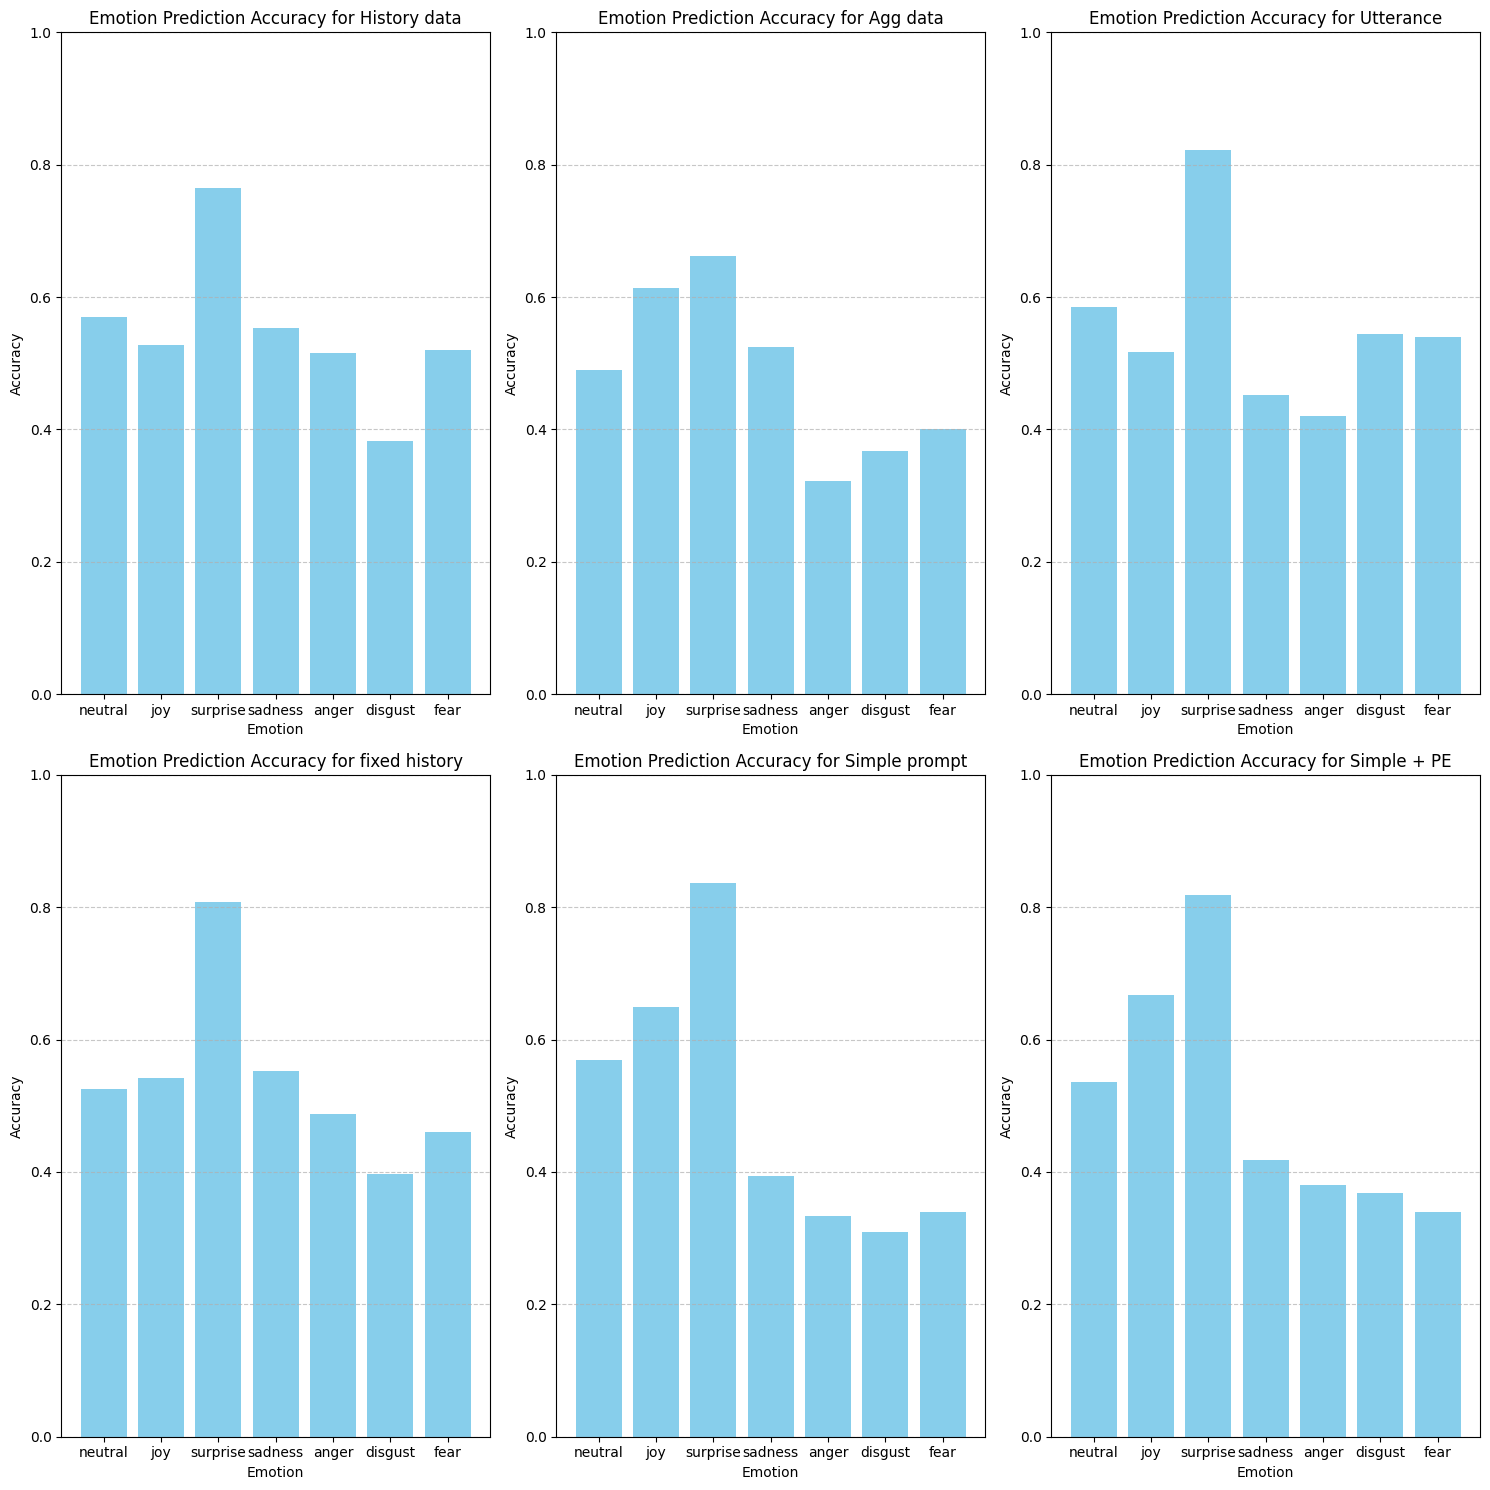

In [ ]:
import matplotlib.pyplot as plt

def calculate_emotion_accuracy(df, group_b):
    accuracies = []
    for emotion in group_b:
        accuracy = (df[df['Emotion'] == emotion]['Emotion'] == df[df['Emotion'] == emotion]['prediction']).mean()
        accuracies.append(accuracy)
    return accuracies

labels = ['History data', 'Agg data', 'Utterance', 'fixed history', 'Simple prompt', 'Simple + PE']
dataframes = [accum, ssakda, utt, threeaccum, gandan, al_gandan]

group_b = ["neutral", "joy", "surprise", "sadness", "anger", "disgust", "fear"]

accuracies = {}
for label, df in zip(labels, dataframes):
    accuracies[label] = calculate_emotion_accuracy(df, group_b)

fig, axs = plt.subplots(2, 3, figsize=(15, 15))
axs = axs.flatten()

for i, (label, accuracy_list) in enumerate(accuracies.items()):
    axs[i].bar(group_b, accuracy_list, color='skyblue')
    axs[i].set_xlabel('Emotion')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_title(f'Emotion Prediction Accuracy for {label}')
    axs[i].set_ylim(0, 1)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
accuracy_per_emotion = {}
for emotion in group_b:
    mask = threeaccum['Emotion'] == emotion
    accuracy = (threeaccum[mask]['Emotion'] == threeaccum[mask]['prediction']).mean()
    accuracy_per_emotion[emotion] = accuracy

plt.figure(figsize=(10, 6))
plt.bar(accuracy_per_emotion.keys(), accuracy_per_emotion.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Accuracy')
plt.title('Accuracy per Emotion')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
accuracy_per_emotion = {}
for emotion in group_b:
    mask = utt['Emotion'] == emotion
    accuracy = (utt[mask]['Emotion'] == utt[mask]['prediction']).mean()
    accuracy_per_emotion[emotion] = accuracy

# Plotting the accuracy per emotion
plt.figure(figsize=(10, 6))
plt.bar(accuracy_per_emotion.keys(), accuracy_per_emotion.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Accuracy')
plt.title('Accuracy per Emotion')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

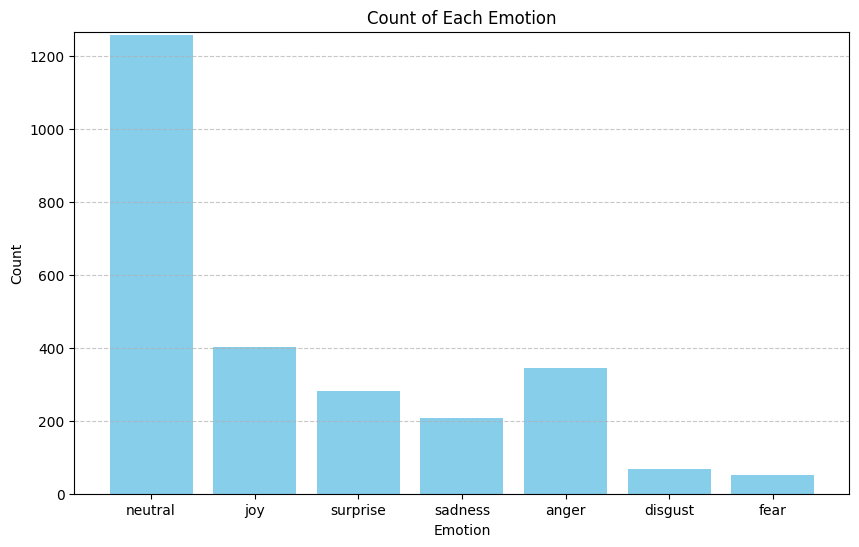

In [ ]:
emotion_counts = utt['Emotion'].value_counts()

emotion_counts = emotion_counts.reindex(group_b)

plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.ylim(0, emotion_counts.max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(accum['prediction'].unique())


['surprise' 'neutral' 'joy' 'anger' 'disgust' 'fear' 'sadness']


In [ ]:
accuracy1 = (accum['Emotion'] == accum['prediction']).mean()
accuracy2 = (utt['Emotion'] == utt['prediction']).mean()
accuracy3 = (threeaccum['Emotion'] == threeaccum['prediction']).mean()
accuracy4 = (ssakda['Emotion'] == ssakda['prediction']).mean()
accuracy5 = (gandan['Emotion'] == gandan['prediction']).mean()

print(f"Accum Accuracy: {accuracy1 * 100:.2f}%")
print(f"Utterance Accuracy: {accuracy2 * 100:.2f}%")
print(f"threeaccum Accuracy: {accuracy3 * 100:.2f}%")
print(f"ssakda Accuracy: {accuracy4 * 100:.2f}%")
print(f"gandanutt Accuracy: {accuracy5 * 100:.2f}%")

Accum Accuracy: 56.97%
Utterance Accuracy: 56.59%
threeaccum Accuracy: 55.06%
ssakda Accuracy: 51.99%
gandanutt Accuracy: 55.40%
